In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

#### 3.1 바이앤홀드 전략

            Close  Open  High   Low      Volume  Change
Date                                                   
1997-05-15   1.96  2.44  2.50  1.93  72160000.0 -0.9962
1997-05-16   1.73  1.97  1.98  1.71  14700000.0 -0.1173
1997-05-19   1.71  1.76  1.77  1.62   6110000.0 -0.0116
1997-05-20   1.64  1.73  1.75  1.64   5470000.0 -0.0409
1997-05-21   1.43  1.64  1.65  1.37  18850000.0 -0.1280


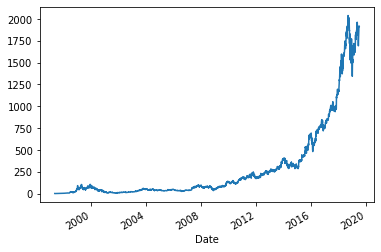

In [45]:
df = fdr.DataReader('AMZN', '1997-05-15', '2019-06-24')
print(df.head())
df['Close'].plot()

In [46]:
# 결측치 확인
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Close,Open,High,Low,Volume,Change
Date,,,,,,


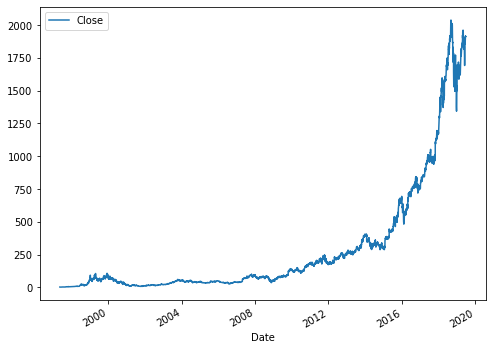

In [47]:
price_df = df.loc[:,['Close']].copy()
price_df.plot(figsize=(8,6))

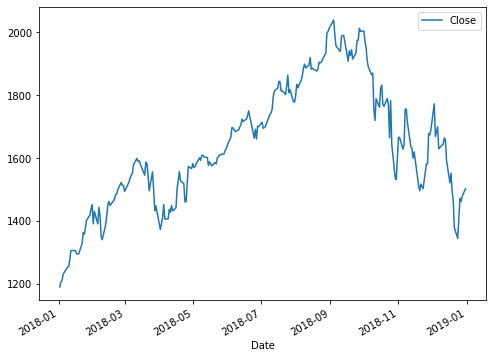

In [48]:
from_date = '2018-01-01'
to_date = '2018-12-31'
price_df.loc[from_date:to_date].plot(figsize=(8,6))

#### 일별 수익률 계산

In [49]:
price_df['daily_rtn'] = price_df['Close'].pct_change()
price_df.head()

,Close,daily_rtn
Date,,
1997-05-15,1.96,NaN
1997-05-16,1.73,-0.117347
1997-05-19,1.71,-0.011561
1997-05-20,1.64,-0.040936
1997-05-21,1.43,-0.128049


In [50]:
# 누적 수익률 계산 : pd.cumprod() 활용
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df.head()

,Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.96,NaN,NaN
1997-05-16,1.73,-0.117347,0.882653
1997-05-19,1.71,-0.011561,0.872449
1997-05-20,1.64,-0.040936,0.836735
1997-05-21,1.43,-0.128049,0.729592


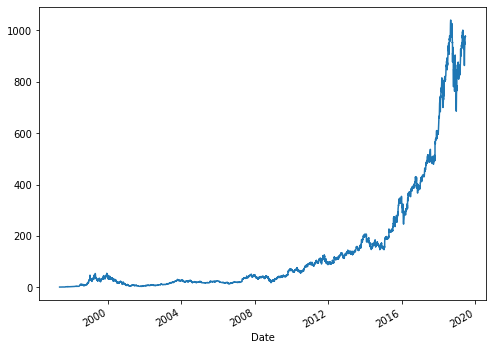

In [51]:
price_df['st_rtn'].plot(figsize=(8,6))

누적 수익:  10.389208554988663


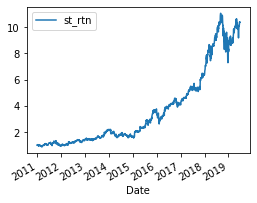

In [52]:
base_date = '2011-01-03'
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date,['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익: ', tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize=(4,3))

#### 3.2 투자성과 분석지표

#### 3.2.1 연평균 복리 수익률(CAGR)

In [54]:
CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252./len(price_df.index)) - 1   # 1년을 252일로 계산
CAGR

0.36585722839136126

#### 3.2.2 최대 낙폭(MDD)

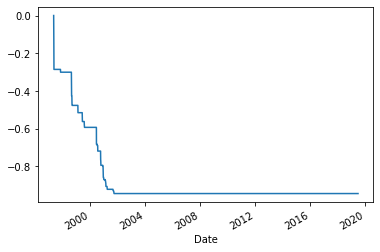

In [55]:
historical_max = price_df['Close'].cummax()
daily_drawdown = price_df['Close'] / historical_max -1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

#### 3.2.3 변동성(Vol)

In [56]:
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)   # 주가의 변동폭은 시간의 제곱근에 비례 --> 일단위변동성(수익률의 표준편차) * 252의 제곱근하여 연율화
VOL

0.6006516041231503

#### 3.2.4 샤프 지수

In [57]:
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
Sharpe

0.8138190400691675

In [60]:
CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252./len(price_df['daily_rtn'])) - 1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()

print('CAGR : ', round(CAGR*100,2), '%')
print('Sharpe : ', round(Sharpe,2))
print('VOL : ', round(VOL*100,2), '%')
print('MDD : ', round(-1*MDD*100,2), '%')

CAGR :  36.59 %
Sharpe :  0.81
VOL :  60.07 %
MDD :  94.4 %
